New Change (Feb 15 2019): Download multiprocessing to run new spotfuncs `get_lyrics()`

Open Terminal

`pip install multiprocess`

https://pypi.org/project/multiprocess/

In [1]:
import spotipy
spotify = spotipy.Spotify()
import sys
import pandas as pd
from spotipy.oauth2 import SpotifyClientCredentials
from bs4 import BeautifulSoup
import lxml
import spotfuncs 
import requests
import pandas as pd
import numpy as np
from multiprocessing import Pool

In [2]:
import nltk
from nltk.tokenize import TweetTokenizer

In [3]:
filepath = "/Users/ajaypatel21/genius.txt"

In [4]:
artist_id = spotfuncs.search_genius("Travis Scott", credentials_file=filepath)
genius_songs = spotfuncs.get_songs(artist_id, credentials_file=filepath)

In [5]:
#genius_songs["90210"]

In [6]:
#name = "SICKO MODE"
#url = genius_songs["SICKO MODE"][1]

#lyrics = spotfuncs.get_lyrics(url)

#print(name, '\n')
#print(lyrics)

In [7]:
#travis_scott = pd.DataFrame([i for i in genius_songs.keys()],columns=["pos"])
#travis_scott.head()

New Change (Feb 15 2019): Used multiprocessing to make scraping lyrics much faster.

- spotfuncs.get_lyrics(`genius_songs`) will return a list of lyrics for every song in the dict
- spotfuncs.get_lyrics(`url`) will return the lyrics for any url of a genius song you get

In [8]:
#travis_scott["lyrics"] = spotfuncs.get_lyrics(genius_songs)

In [9]:
#travis_scott.head()

In [10]:
#spotfuncs.get_lyrics("https://genius.com/Partynextdoor-tbh-lyrics")

In [13]:
def my_big_function(artist):
    import nltk
    from nltk.tokenize import sent_tokenize, word_tokenize
    from nltk.corpus import stopwords
    from nltk.tokenize import PunktSentenceTokenizer
    
    artist_id = spotfuncs.search_genius(artist, credentials_file=filepath)
    genius_songs = spotfuncs.get_songs(artist_id, credentials_file=filepath)
    df = pd.DataFrame([i for i in genius_songs.keys()],columns=["pos"])
    df["lyrics"] = spotfuncs.get_lyrics(genius_songs)
    
    noun_list = []
    verb_list = []
    preposition_list = []
    adjective_list = []

    for i in df.lyrics:
        sentences = nltk.sent_tokenize(i)
        data = []
        for sent in sentences:
            data = data + nltk.pos_tag(nltk.word_tokenize(sent))

        noun_count = 0
        verb_count = 0
        preposition_count = 0
        adjective_count = 0
        for word in data: 
            if 'NN' in word[1]: 
                noun_count += 1
            elif 'NNS' in word[1]:
                noun_count += 1
            elif 'NNP' in word[1]:
                noun_count += 1
            elif 'NNPS' in word[1]:
                noun_count += 1     
            elif 'IN' in word[1]:
                preposition_count += 1
            elif 'JJ' in word[1]:
                adjective_count += 1
            elif 'JJR' in word[1]:
                adjective_count += 1
            elif 'JJS' in word[1]:
                adjective_count += 1
            elif 'VB' in word[1]:
                verb_count += 1
            elif 'VBD' in word[1]:
                verb_count += 1
            elif 'VBG' in word[1]:
                verb_count += 1
            elif 'VBN' in word[1]:
                verb_count += 1
            elif 'VBP' in word[1]:
                verb_count += 1
            elif 'VBZ' in word[1]:
                verb_count += 1    

        noun_list.append(noun_count)  
        verb_list.append(verb_count)
        preposition_list.append(preposition_count)
        adjective_list.append(adjective_count)

    my_dict = {"Noun": noun_list, 
                "Verb": verb_list, 
                "Adjective": adjective_list, 
                "Preposition": preposition_list}
    
    other_df = pd.DataFrame(my_dict, columns=["Noun", "Verb", "Adjective", "Preposition"])
    
    df = df.join(other_df)
    df["artist"] = artist
    
    return df

In [14]:
drake = my_big_function("Drake")
post_malone = my_big_function("Post Malone")
xxxtentaction = my_big_function("XXXTENTACION")
j_balvin = my_big_function("J Balvin")
ed_sheeran = my_big_function("Ed Sheeran")

In [15]:
top5 = drake.append(post_malone)
top5 = top5.append(xxxtentaction)
top5 = top5.append(j_balvin)
top5 = top5.append(ed_sheeran)

artist
Drake           AxesSubplot(0.125,0.125;0.775x0.755)
Ed Sheeran      AxesSubplot(0.125,0.125;0.775x0.755)
J Balvin        AxesSubplot(0.125,0.125;0.775x0.755)
Post Malone     AxesSubplot(0.125,0.125;0.775x0.755)
XXXTENTACION    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Noun, dtype: object

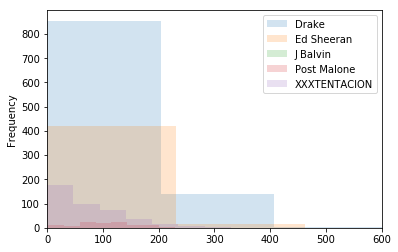

In [24]:
top5.groupby(["artist"]).Noun.plot.hist(legend=True, alpha=.2, xlim=(0,600))

artist
Drake           AxesSubplot(0.125,0.125;0.775x0.755)
Ed Sheeran      AxesSubplot(0.125,0.125;0.775x0.755)
J Balvin        AxesSubplot(0.125,0.125;0.775x0.755)
Post Malone     AxesSubplot(0.125,0.125;0.775x0.755)
XXXTENTACION    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Verb, dtype: object

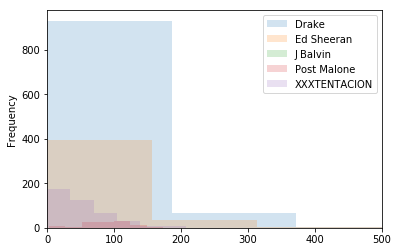

In [22]:
top5.groupby(["artist"]).Verb.plot.hist(legend=True, alpha=.2, xlim=(0,500))

artist
Drake           AxesSubplot(0.125,0.125;0.775x0.755)
Ed Sheeran      AxesSubplot(0.125,0.125;0.775x0.755)
J Balvin        AxesSubplot(0.125,0.125;0.775x0.755)
Post Malone     AxesSubplot(0.125,0.125;0.775x0.755)
XXXTENTACION    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Preposition, dtype: object

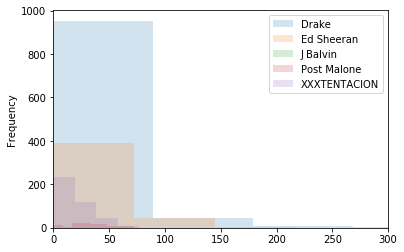

In [21]:
top5.groupby(["artist"]).Preposition.plot.hist(legend=True, alpha=.2, xlim=(0,300))

artist
Drake           AxesSubplot(0.125,0.125;0.775x0.755)
Ed Sheeran      AxesSubplot(0.125,0.125;0.775x0.755)
J Balvin        AxesSubplot(0.125,0.125;0.775x0.755)
Post Malone     AxesSubplot(0.125,0.125;0.775x0.755)
XXXTENTACION    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Adjective, dtype: object

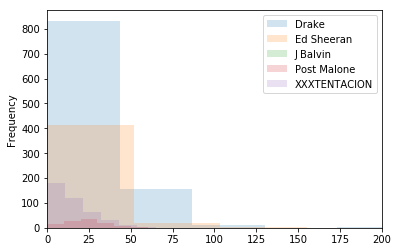

In [20]:
top5.groupby(["artist"]).Adjective.plot.hist(legend=True, alpha=.2, xlim=(0,200))

In [38]:
top5["Noun_proportion"] = (top5.Noun/(top5.Noun + top5.Verb + top5.Adjective + top5.Preposition)).fillna(0)
top5["Verb_proportion"] = (top5.Verb/(top5.Noun + top5.Verb + top5.Adjective + top5.Preposition)).fillna(0)
top5["Adjective_proportion"] = (top5.Adjective/(top5.Noun + top5.Verb + top5.Adjective + top5.Preposition)).fillna(0)
top5["Preposition_proportion"] = (top5.Preposition/(top5.Noun + top5.Verb + top5.Adjective + top5.Preposition)).fillna(0)

In [71]:
top5.head()

,pos,lyrics,Noun,Verb,Adjective,Preposition,artist,Noun_proportion,Verb_proportion,Adjective_proportion,Preposition_proportion
0,.,.,0,0,0,0,Drake,0.000000,0.000000,0.000000,0.000000
1,0 to 100 / The Catch Up,"Fuck bein' on some chill shit We go 0 to 100, ...",217,193,70,96,Drake,0.376736,0.335069,0.121528,0.166667
2,100,"Real nigga shit Other night at your crib, it w...",247,184,69,91,Drake,0.417936,0.311337,0.116751,0.153976
3,100it Racks,"Future ] Summer 16! Yeah! Freebandz, OVO DJ Es...",316,191,44,99,Drake,0.486154,0.293846,0.067692,0.152308
4,10 Bands,"10 Bands, 50 bands, 100 bands, fuck it, man Le...",122,112,17,38,Drake,0.422145,0.387543,0.058824,0.131488


In [46]:
(top5.groupby(["artist"]).Noun_proportion.mean(), top5.groupby(["artist"]).Verb_proportion.mean())

(artist
 Drake           0.434643
 Ed Sheeran      0.375260
 J Balvin        0.582734
 Post Malone     0.405890
 XXXTENTACION    0.444974
 Name: Noun_proportion, dtype: float64, artist
 Drake           0.333797
 Ed Sheeran      0.375058
 J Balvin        0.257194
 Post Malone     0.368980
 XXXTENTACION    0.336294
 Name: Verb_proportion, dtype: float64)

In [85]:
test_df = pd.DataFrame({"Drake": [top5.groupby(["artist"]).Noun_proportion.mean()[0],
                          top5.groupby(["artist"]).Verb_proportion.mean()[0],
                          top5.groupby(["artist"]).Adjective_proportion.mean()[0],
                          top5.groupby(["artist"]).Preposition_proportion.mean()[0]],
                        "Ed Sheeran": [top5.groupby(["artist"]).Noun_proportion.mean()[1],
                          top5.groupby(["artist"]).Verb_proportion.mean()[1],
                          top5.groupby(["artist"]).Adjective_proportion.mean()[1],
                          top5.groupby(["artist"]).Preposition_proportion.mean()[1]],
                        "J Balvin": [top5.groupby(["artist"]).Noun_proportion.mean()[2],
                          top5.groupby(["artist"]).Verb_proportion.mean()[2],
                          top5.groupby(["artist"]).Adjective_proportion.mean()[2],
                          top5.groupby(["artist"]).Preposition_proportion.mean()[2]],
                        "Post Malone": [top5.groupby(["artist"]).Noun_proportion.mean()[3],
                          top5.groupby(["artist"]).Verb_proportion.mean()[3],
                          top5.groupby(["artist"]).Adjective_proportion.mean()[3],
                          top5.groupby(["artist"]).Preposition_proportion.mean()[3]], 
                        "XXXTENTACION": [top5.groupby(["artist"]).Noun_proportion.mean()[4],
                          top5.groupby(["artist"]).Verb_proportion.mean()[4],
                          top5.groupby(["artist"]).Adjective_proportion.mean()[4],
                          top5.groupby(["artist"]).Preposition_proportion.mean()[4]]})

test_df

,Drake,Ed Sheeran,J Balvin,Post Malone,XXXTENTACION
0,0.434643,0.375260,0.582734,0.405890,0.444974
1,0.333797,0.375058,0.257194,0.368980,0.336294
2,0.088264,0.090452,0.066547,0.093379,0.088625
3,0.128444,0.156943,0.093525,0.131751,0.125240


In [87]:
test_df["Grammar"] = ["Noun", "Verb", "Adjective", "Preposition"]
test_df = test_df.set_index("Grammar")
test_df

,Drake,Ed Sheeran,J Balvin,Post Malone,XXXTENTACION
Grammar,,,,,
Noun,0.434643,0.375260,0.582734,0.405890,0.444974
Verb,0.333797,0.375058,0.257194,0.368980,0.336294
Adjective,0.088264,0.090452,0.066547,0.093379,0.088625
Preposition,0.128444,0.156943,0.093525,0.131751,0.125240


(<matplotlib.axes._subplots.AxesSubplot at 0x1a21000160>, Grammar
 Noun           0.434643
 Verb           0.333797
 Adjective      0.088264
 Preposition    0.128444
 Name: Drake, dtype: float64)

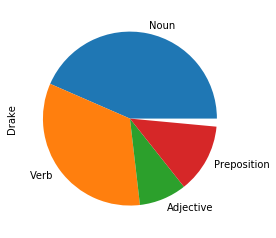

In [91]:
test_df.Drake.plot.pie(), test_df.Drake

(<matplotlib.axes._subplots.AxesSubplot at 0x1a21000d68>, Grammar
 Noun           0.375260
 Verb           0.375058
 Adjective      0.090452
 Preposition    0.156943
 Name: Ed Sheeran, dtype: float64)

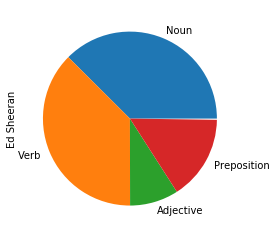

In [92]:
test_df["Ed Sheeran"].plot.pie(), test_df["Ed Sheeran"]

(<matplotlib.axes._subplots.AxesSubplot at 0x1a210ae748>, Grammar
 Noun           0.582734
 Verb           0.257194
 Adjective      0.066547
 Preposition    0.093525
 Name: J Balvin, dtype: float64)

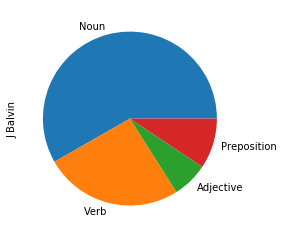

In [93]:
test_df["J Balvin"].plot.pie(), test_df["J Balvin"]

(<matplotlib.axes._subplots.AxesSubplot at 0x1a213d7ba8>, Grammar
 Noun           0.405890
 Verb           0.368980
 Adjective      0.093379
 Preposition    0.131751
 Name: Post Malone, dtype: float64)

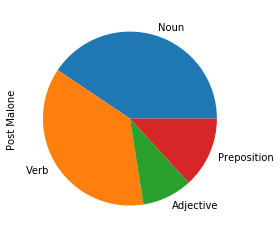

In [94]:
test_df["Post Malone"].plot.pie(), test_df["Post Malone"]

(<matplotlib.axes._subplots.AxesSubplot at 0x104978e80>, Grammar
 Noun           0.444974
 Verb           0.336294
 Adjective      0.088625
 Preposition    0.125240
 Name: XXXTENTACION, dtype: float64)

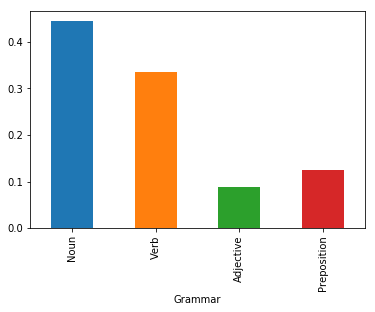

In [98]:
test_df["XXXTENTACION"].plot.bar(), test_df["XXXTENTACION"]

In [145]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

all_data = top5.lyrics
for data in all_data: 
    stopWords = set(stopwords.words('english'))
    words = word_tokenize(data)
    wordsFiltered = []
    
    for w in words:
        if w not in stopWords:
            wordsFiltered.append(w)
 
    #print(wordsFiltered)
    
    summary = {"positive":0,"neutral":0,"negative":0}
    for x in wordsFiltered:
        ss = sid.polarity_scores(x)
        if ss["compound"] == 0.0: 
            summary["neutral"] +=1
        elif ss["compound"] > 0.0:
            summary["positive"] +=1
        else:
            summary["negative"] +=1
    print(summary)

{'positive': 0, 'neutral': 1, 'negative': 0}
{'positive': 33, 'neutral': 693, 'negative': 42}
{'positive': 57, 'neutral': 644, 'negative': 69}
{'positive': 24, 'neutral': 713, 'negative': 15}
{'positive': 26, 'neutral': 405, 'negative': 14}
{'positive': 18, 'neutral': 293, 'negative': 15}
{'positive': 1, 'neutral': 45, 'negative': 2}
{'positive': 18, 'neutral': 274, 'negative': 3}
{'positive': 3, 'neutral': 24, 'negative': 3}
{'positive': 45, 'neutral': 430, 'negative': 20}
{'positive': 12, 'neutral': 406, 'negative': 26}
{'positive': 27, 'neutral': 461, 'negative': 35}
{'positive': 34, 'neutral': 499, 'negative': 17}
{'positive': 18, 'neutral': 161, 'negative': 4}
{'positive': 35, 'neutral': 496, 'negative': 22}
{'positive': 1, 'neutral': 132, 'negative': 3}
{'positive': 20, 'neutral': 248, 'negative': 6}
{'positive': 25, 'neutral': 504, 'negative': 17}
{'positive': 35, 'neutral': 480, 'negative': 28}
{'positive': 27, 'neutral': 405, 'negative': 36}
{'positive': 26, 'neutral': 422, 'n

{'positive': 20, 'neutral': 569, 'negative': 15}
{'positive': 28, 'neutral': 577, 'negative': 15}
{'positive': 39, 'neutral': 452, 'negative': 28}
{'positive': 5, 'neutral': 64, 'negative': 9}
{'positive': 337, 'neutral': 5731, 'negative': 410}
{'positive': 30, 'neutral': 388, 'negative': 65}
{'positive': 1, 'neutral': 10, 'negative': 0}
{'positive': 17, 'neutral': 286, 'negative': 6}
{'positive': 9, 'neutral': 251, 'negative': 14}
{'positive': 5, 'neutral': 39, 'negative': 2}
{'positive': 20, 'neutral': 263, 'negative': 15}
{'positive': 24, 'neutral': 165, 'negative': 8}
{'positive': 38, 'neutral': 402, 'negative': 24}
{'positive': 15, 'neutral': 187, 'negative': 5}
{'positive': 1, 'neutral': 41, 'negative': 2}
{'positive': 18, 'neutral': 275, 'negative': 5}
{'positive': 2, 'neutral': 58, 'negative': 0}
{'positive': 19, 'neutral': 454, 'negative': 9}
{'positive': 18, 'neutral': 175, 'negative': 8}
{'positive': 34, 'neutral': 598, 'negative': 26}
{'positive': 23, 'neutral': 516, 'negat

{'positive': 20, 'neutral': 393, 'negative': 17}
{'positive': 7, 'neutral': 86, 'negative': 6}
{'positive': 25, 'neutral': 477, 'negative': 26}
{'positive': 12, 'neutral': 235, 'negative': 15}
{'positive': 23, 'neutral': 195, 'negative': 0}
{'positive': 18, 'neutral': 149, 'negative': 4}
{'positive': 16, 'neutral': 223, 'negative': 6}
{'positive': 16, 'neutral': 244, 'negative': 9}
{'positive': 16, 'neutral': 239, 'negative': 8}
{'positive': 17, 'neutral': 158, 'negative': 4}
{'positive': 6, 'neutral': 88, 'negative': 2}
{'positive': 25, 'neutral': 148, 'negative': 7}
{'positive': 17, 'neutral': 274, 'negative': 8}
{'positive': 8, 'neutral': 186, 'negative': 2}
{'positive': 12, 'neutral': 290, 'negative': 4}
{'positive': 7, 'neutral': 169, 'negative': 3}
{'positive': 15, 'neutral': 298, 'negative': 4}
{'positive': 15, 'neutral': 361, 'negative': 19}
{'positive': 23, 'neutral': 170, 'negative': 11}
{'positive': 2, 'neutral': 147, 'negative': 9}
{'positive': 15, 'neutral': 133, 'negative

{'positive': 38, 'neutral': 1782, 'negative': 8}
{'positive': 3, 'neutral': 51, 'negative': 0}
{'positive': 3, 'neutral': 134, 'negative': 5}
{'positive': 14, 'neutral': 241, 'negative': 20}
{'positive': 61, 'neutral': 378, 'negative': 31}
{'positive': 51, 'neutral': 409, 'negative': 24}
{'positive': 44, 'neutral': 370, 'negative': 21}
{'positive': 25, 'neutral': 254, 'negative': 25}
{'positive': 40, 'neutral': 275, 'negative': 33}
{'positive': 1, 'neutral': 34, 'negative': 2}
{'positive': 25, 'neutral': 405, 'negative': 31}
{'positive': 17, 'neutral': 235, 'negative': 10}
{'positive': 51, 'neutral': 360, 'negative': 20}
{'positive': 79, 'neutral': 269, 'negative': 0}
{'positive': 98, 'neutral': 321, 'negative': 0}
{'positive': 19, 'neutral': 341, 'negative': 17}
{'positive': 7, 'neutral': 249, 'negative': 10}
{'positive': 5, 'neutral': 163, 'negative': 10}
{'positive': 19, 'neutral': 406, 'negative': 51}
{'positive': 12, 'neutral': 347, 'negative': 44}
{'positive': 7, 'neutral': 575, 

{'positive': 47, 'neutral': 757, 'negative': 31}
{'positive': 36, 'neutral': 289, 'negative': 42}
{'positive': 14, 'neutral': 368, 'negative': 9}
{'positive': 20, 'neutral': 187, 'negative': 9}
{'positive': 5, 'neutral': 30, 'negative': 0}
{'positive': 29, 'neutral': 558, 'negative': 14}
{'positive': 35, 'neutral': 618, 'negative': 49}
{'positive': 7, 'neutral': 422, 'negative': 14}
{'positive': 12, 'neutral': 504, 'negative': 10}
{'positive': 1, 'neutral': 48, 'negative': 0}
{'positive': 22, 'neutral': 259, 'negative': 12}
{'positive': 37, 'neutral': 546, 'negative': 29}
{'positive': 16, 'neutral': 199, 'negative': 7}
{'positive': 44, 'neutral': 601, 'negative': 66}
{'positive': 59, 'neutral': 441, 'negative': 13}
{'positive': 19, 'neutral': 481, 'negative': 13}
{'positive': 23, 'neutral': 396, 'negative': 14}
{'positive': 18, 'neutral': 288, 'negative': 19}
{'positive': 24, 'neutral': 312, 'negative': 19}
{'positive': 30, 'neutral': 429, 'negative': 37}
{'positive': 30, 'neutral': 21

{'positive': 49, 'neutral': 326, 'negative': 15}
{'positive': 50, 'neutral': 271, 'negative': 8}
{'positive': 6, 'neutral': 141, 'negative': 12}
{'positive': 30, 'neutral': 454, 'negative': 21}
{'positive': 1, 'neutral': 10, 'negative': 0}
{'positive': 13, 'neutral': 120, 'negative': 18}
{'positive': 0, 'neutral': 24, 'negative': 0}
{'positive': 14, 'neutral': 174, 'negative': 7}
{'positive': 12, 'neutral': 659, 'negative': 3}
{'positive': 17, 'neutral': 236, 'negative': 13}
{'positive': 14, 'neutral': 162, 'negative': 7}
{'positive': 107, 'neutral': 1460, 'negative': 128}
{'positive': 18, 'neutral': 229, 'negative': 16}
{'positive': 46, 'neutral': 567, 'negative': 11}
{'positive': 23, 'neutral': 366, 'negative': 16}
{'positive': 10, 'neutral': 136, 'negative': 6}
{'positive': 36, 'neutral': 350, 'negative': 24}
{'positive': 27, 'neutral': 351, 'negative': 28}
{'positive': 45, 'neutral': 362, 'negative': 13}
{'positive': 12, 'neutral': 235, 'negative': 12}
{'positive': 40, 'neutral': 3

{'positive': 46, 'neutral': 446, 'negative': 25}
{'positive': 12, 'neutral': 187, 'negative': 11}
{'positive': 0, 'neutral': 26, 'negative': 0}
{'positive': 42, 'neutral': 337, 'negative': 6}
{'positive': 16, 'neutral': 242, 'negative': 5}
{'positive': 24, 'neutral': 464, 'negative': 11}
{'positive': 53, 'neutral': 567, 'negative': 8}
{'positive': 53, 'neutral': 493, 'negative': 50}
{'positive': 6, 'neutral': 336, 'negative': 29}
{'positive': 0, 'neutral': 26, 'negative': 2}
{'positive': 13, 'neutral': 311, 'negative': 8}
{'positive': 23, 'neutral': 352, 'negative': 20}
{'positive': 1, 'neutral': 10, 'negative': 0}
{'positive': 26, 'neutral': 328, 'negative': 12}
{'positive': 17, 'neutral': 363, 'negative': 36}
{'positive': 31, 'neutral': 590, 'negative': 53}
{'positive': 25, 'neutral': 486, 'negative': 21}
{'positive': 28, 'neutral': 127, 'negative': 11}
{'positive': 43, 'neutral': 420, 'negative': 28}
{'positive': 50, 'neutral': 273, 'negative': 25}
{'positive': 24, 'neutral': 327, '

{'positive': 39, 'neutral': 253, 'negative': 31}
{'positive': 21, 'neutral': 133, 'negative': 101}
{'positive': 10, 'neutral': 152, 'negative': 28}
{'positive': 30, 'neutral': 156, 'negative': 7}
{'positive': 9, 'neutral': 105, 'negative': 9}
{'positive': 13, 'neutral': 275, 'negative': 38}
{'positive': 9, 'neutral': 214, 'negative': 54}
{'positive': 39, 'neutral': 233, 'negative': 92}
{'positive': 4, 'neutral': 41, 'negative': 5}
{'positive': 26, 'neutral': 620, 'negative': 32}
{'positive': 1, 'neutral': 10, 'negative': 0}
{'positive': 1, 'neutral': 10, 'negative': 0}
{'positive': 1, 'neutral': 56, 'negative': 11}
{'positive': 4, 'neutral': 174, 'negative': 28}
{'positive': 34, 'neutral': 646, 'negative': 122}
{'positive': 8, 'neutral': 198, 'negative': 43}
{'positive': 1, 'neutral': 10, 'negative': 0}
{'positive': 12, 'neutral': 95, 'negative': 8}
{'positive': 1, 'neutral': 8, 'negative': 0}
{'positive': 23, 'neutral': 184, 'negative': 30}
{'positive': 0, 'neutral': 36, 'negative': 6

{'positive': 56, 'neutral': 498, 'negative': 54}
{'positive': 0, 'neutral': 130, 'negative': 4}
{'positive': 0, 'neutral': 0, 'negative': 0}
{'positive': 1, 'neutral': 10, 'negative': 0}
{'positive': 27, 'neutral': 328, 'negative': 18}
{'positive': 10, 'neutral': 697, 'negative': 17}
{'positive': 0, 'neutral': 34, 'negative': 1}
{'positive': 9, 'neutral': 82, 'negative': 18}
{'positive': 13, 'neutral': 257, 'negative': 40}
{'positive': 31, 'neutral': 155, 'negative': 14}
{'positive': 18, 'neutral': 103, 'negative': 19}
{'positive': 18, 'neutral': 346, 'negative': 24}
{'positive': 19, 'neutral': 268, 'negative': 24}
{'positive': 25, 'neutral': 169, 'negative': 6}
{'positive': 8, 'neutral': 106, 'negative': 20}
{'positive': 36, 'neutral': 221, 'negative': 14}
{'positive': 8, 'neutral': 143, 'negative': 49}
{'positive': 25, 'neutral': 218, 'negative': 19}
{'positive': 10, 'neutral': 80, 'negative': 5}
{'positive': 8, 'neutral': 253, 'negative': 24}
{'positive': 1, 'neutral': 50, 'negative

{'positive': 14, 'neutral': 230, 'negative': 16}
{'positive': 5, 'neutral': 242, 'negative': 4}
{'positive': 5, 'neutral': 255, 'negative': 4}
{'positive': 5, 'neutral': 240, 'negative': 4}
{'positive': 10, 'neutral': 251, 'negative': 4}
{'positive': 3, 'neutral': 161, 'negative': 5}
{'positive': 6, 'neutral': 164, 'negative': 4}
{'positive': 1, 'neutral': 233, 'negative': 5}
{'positive': 15, 'neutral': 210, 'negative': 4}
{'positive': 19, 'neutral': 310, 'negative': 18}
{'positive': 10, 'neutral': 479, 'negative': 12}
{'positive': 35, 'neutral': 365, 'negative': 8}
{'positive': 0, 'neutral': 170, 'negative': 8}
{'positive': 31, 'neutral': 199, 'negative': 6}
{'positive': 20, 'neutral': 526, 'negative': 25}
{'positive': 6, 'neutral': 155, 'negative': 4}
{'positive': 27, 'neutral': 363, 'negative': 19}
{'positive': 31, 'neutral': 358, 'negative': 17}
{'positive': 27, 'neutral': 374, 'negative': 19}
{'positive': 17, 'neutral': 251, 'negative': 13}
{'positive': 34, 'neutral': 456, 'negati

{'positive': 32, 'neutral': 452, 'negative': 25}
{'positive': 4, 'neutral': 75, 'negative': 19}
{'positive': 17, 'neutral': 450, 'negative': 14}
{'positive': 7, 'neutral': 91, 'negative': 5}
{'positive': 1, 'neutral': 722, 'negative': 4}
{'positive': 7, 'neutral': 91, 'negative': 5}
{'positive': 38, 'neutral': 474, 'negative': 45}
{'positive': 0, 'neutral': 1, 'negative': 0}
{'positive': 9, 'neutral': 251, 'negative': 4}
{'positive': 16, 'neutral': 149, 'negative': 3}
{'positive': 14, 'neutral': 136, 'negative': 0}
{'positive': 11, 'neutral': 155, 'negative': 10}
{'positive': 21, 'neutral': 191, 'negative': 16}
{'positive': 36, 'neutral': 342, 'negative': 4}
{'positive': 16, 'neutral': 191, 'negative': 2}
{'positive': 9, 'neutral': 156, 'negative': 7}
{'positive': 425, 'neutral': 6816, 'negative': 184}
{'positive': 25, 'neutral': 176, 'negative': 2}
{'positive': 16, 'neutral': 105, 'negative': 3}
{'positive': 47, 'neutral': 342, 'negative': 7}
{'positive': 47, 'neutral': 366, 'negative

In [141]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

data = top5[top5.artist == "Ed Sheeran"].loc[285].lyrics
stopWords = set(stopwords.words('english'))
words = word_tokenize(data)
wordsFiltered = []

for w in words:
    if w not in stopWords:
        wordsFiltered.append(w)
 
#print(wordsFiltered)

summary = {"positive":0,"neutral":0,"negative":0}
for x in wordsFiltered:
    ss = sid.polarity_scores(x)
    if ss["compound"] == 0.0: 
        summary["neutral"] +=1
    elif ss["compound"] > 0.0:
        summary["positive"] +=1
    else:
        summary["negative"] +=1
print(summary)

{'positive': 47, 'neutral': 342, 'negative': 7}


In [148]:
top100 = pd.read_csv("/Users/ajaypatel21/Desktop/spottop100.csv")

In [149]:
top100.head()

,Position,Track Name,Artist,Streams,URL,Date,Region
0,1,Corazón,Maluma,261479,https://open.spotify.com/track/4lESS6vuruP6a79...,1/9/18,ar
1,2,Échame La Culpa,Luis Fonsi,249298,https://open.spotify.com/track/1zsG4eaZmkA1dvj...,1/9/18,ar
2,3,Criminal,Natti Natasha,216735,https://open.spotify.com/track/6Za3190Sbw39BBC...,1/9/18,ar
3,4,Sensualidad,Bad Bunny,208225,https://open.spotify.com/track/5hcisvFMidkMJlE...,1/9/18,ar
4,5,Déjala que vuelva (feat. Manuel Turizo),Piso 21,204527,https://open.spotify.com/track/33bnxcjePIkcmNj...,1/9/18,ar


In [155]:
top100.groupby(["Track Name", "Region"]).Streams.mean()

Track Name                Region
#JM                       nl         57336.000000
#JesuispasséchezSo EP 11  fr         37208.000000
#Natural                  ar         53898.000000
                          bo          3768.000000
                          cl         38967.000000
                          co          8691.000000
                          cr          5476.000000
                          do          1827.000000
                          ec          8394.000000
                          es         40349.000000
                          gt          4519.000000
                          hn          1411.000000
                          mx        177184.500000
                          pa          2799.000000
                          pe         29902.000000
                          py          3803.333333
                          sv          1767.750000
                          uy          5206.750000
'Till I Collapse          ch          3765.000000
                 

In [158]:
top100["Track Name"].unique()

array(['Corazón', 'Échame La Culpa', 'Criminal', ..., 'Muevelo Mami',
       'Mayor Que Yo', 'Soltera'], dtype=object)

In [159]:
top100.Region.unique()

array(['ar', 'at', 'au', 'be', 'bo', 'br', 'ca', 'ch', 'cl', 'co', 'cr',
       'cz', 'de', 'dk', 'do', 'ec', 'ee', 'es', 'fi', 'fr', 'gb',
       'global', 'gr', 'gt', 'hk', 'hn', 'hu', 'id', 'ie', 'is', 'it',
       'jp', 'lt', 'lv', 'mx', 'my', 'nl', 'no', 'nz', 'pa', 'pe', 'ph',
       'pl', 'pt', 'py', 'se', 'sg', 'sk', 'sv', 'tr', 'tw', 'us', 'uy'],
      dtype=object)

In [161]:
top100[top100.Region == "us"]

,Position,Track Name,Artist,Streams,URL,Date,Region
16523,1,rockstar,Post Malone,1389969,https://open.spotify.com/track/7wGoVu4Dady5GV0...,1/9/18,us
16524,2,Finesse (Remix) [feat. Cardi B],Bruno Mars,1262874,https://open.spotify.com/track/3Vo4wInECJQuz9B...,1/9/18,us
16525,3,No Limit,G-Eazy,1134491,https://open.spotify.com/track/2DQ1ITjI0YoLFzu...,1/9/18,us
16526,4,Bartier Cardi (feat. 21 Savage),Cardi B,1093964,https://open.spotify.com/track/75FDPwaULRdYDn4...,1/9/18,us
16527,5,I Fall Apart,Post Malone,993683,https://open.spotify.com/track/75ZvA4QfFiZvzhj...,1/9/18,us
16528,6,All The Stars (with SZA),Kendrick Lamar,960401,https://open.spotify.com/track/66kQ7wr4d2LwwSj...,1/9/18,us
16529,7,Ric Flair Drip (& Metro Boomin),Offset,953289,https://open.spotify.com/track/7sO5G9EABYOXQKN...,1/9/18,us
16530,8,Him & I (with Halsey),G-Eazy,930717,https://open.spotify.com/track/5k38wzpLb15Ygnc...,1/9/18,us
16531,9,Havana,Camila Cabello,856493,https://open.spotify.com/track/0ofbQMrRDsUaVKq...,1/9/18,us
16532,10,LOVE. FEAT. ZACARI.,Kendrick Lamar,844540,https://open.spotify.com/track/6PGoSes0D9eUDee...,1/9/18,us


In [198]:
large_streams = top100[(top100.Streams >= 100000) & (top100.Region != "global") & (top100.Date == "1/10/18")].set_index("Track Name")


large_streams.groupby(["Region"]).Streams.idxmax()

Region
es                             Échame La Culpa
gb                    River (feat. Ed Sheeran)
it                           La musica non c'è
mx     Déjala que vuelva (feat. Manuel Turizo)
nl                               Blijf Bij Mij
no                    River (feat. Ed Sheeran)
pe                                     Corazón
ph    Hayaan Mo Sila (Inspired by I'm the One)
se                    River (feat. Ed Sheeran)
us                                    rockstar
Name: Streams, dtype: object

In [186]:
top100.Date.unique()

array(['1/9/18', '1/10/18', '1/11/18', '1/12/18', '1/13/18'], dtype=object)

In [180]:
top100.Date

0         1/9/18
1         1/9/18
2         1/9/18
3         1/9/18
4         1/9/18
5         1/9/18
6         1/9/18
7         1/9/18
8         1/9/18
9         1/9/18
10        1/9/18
11        1/9/18
12        1/9/18
13        1/9/18
14        1/9/18
15        1/9/18
16        1/9/18
17        1/9/18
18        1/9/18
19        1/9/18
20        1/9/18
21        1/9/18
22        1/9/18
23        1/9/18
24        1/9/18
25        1/9/18
26        1/9/18
27        1/9/18
28        1/9/18
29        1/9/18
          ...   
18220    1/12/18
18221    1/12/18
18222    1/12/18
18223    1/12/18
18224    1/12/18
18225    1/12/18
18226    1/12/18
18227    1/12/18
18228    1/12/18
18229    1/12/18
18230    1/12/18
18231    1/12/18
18232    1/12/18
18233    1/12/18
18234    1/12/18
18235    1/12/18
18236    1/12/18
18237    1/12/18
18238    1/12/18
18239    1/12/18
18240    1/12/18
18241    1/12/18
18242    1/12/18
18243    1/12/18
18244    1/12/18
18245    1/12/18
18246    1/12/18
18247    1/12/